In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Assuming that the image is passed as a numpy array
# Also, the image is cleaned (does not contain NaNs)
def find_correction_angle(binary_image):
    
    # bounding the rotated rectangle using MBR
    binary_image = binary_image[np.sum(binary_image, axis=1) != 0]
    binary_image = binary_image.T[np.sum(binary_image, axis=0) != 0]
        
    # Finding the edges of the rectangle in row 0 and column 0 using argmax
    # Then using arctan to find the angle    
    
    if 0 in binary_image.shape:
        return Exception("The image does not contain a rectangle")
    
    if np.argmax(binary_image[:,0]) == 0: 
        return 0 # Handling divide by zero
    
    return np.degrees(np.arctan(np.argmax(binary_image[0,:])/np.argmax(binary_image[:,0])))

In [3]:
original_image = np.genfromtxt("rotated.csv", delimiter=',')
find_correction_angle(original_image[1:,:])

35.012578424986458

### Algorithm
#### Removing the top row because it contains NaNs

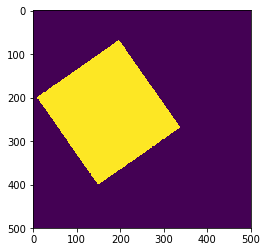

In [4]:
image = original_image[1:,:]
plt.imshow(image)

#### Bounding the rectangle in a box

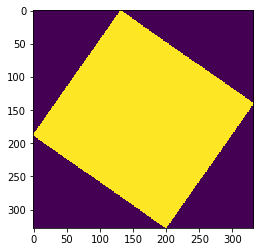

In [5]:
image = image[np.sum(image, axis=1) != 0]
image = image.T[np.sum(image, axis=0) != 0]
plt.imshow(image)

#### Finding the edges of the rectangle in row 0 and column 0. Then using arctan to find the angle

In [6]:
np.degrees(np.arctan(np.argmax(image[0,:])/np.argmax(image[:,0])))

35.012578424986458

## Working with a tiff image

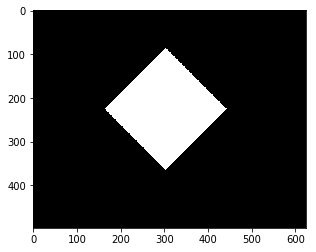

In [7]:
im = Image.open('rect_45.tif')
imarray = np.array(im)
plt.imshow(imarray)

#### flatenning the image

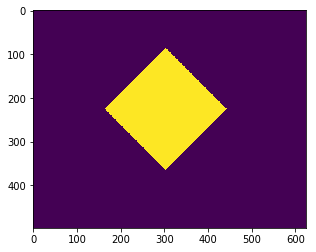

In [8]:
im_flat = imarray.ravel()
im_flat[im_flat < 127] = 0
im_flat[im_flat >= 127] = 1
im_flat = im_flat.reshape(imarray.shape)[:,:,0]
plt.imshow(im_flat)

In [9]:
find_correction_angle(im_flat)

45.0

#### Another example

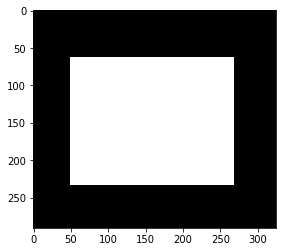

In [10]:
im = Image.open('rect_90.tif')
imarray = np.array(im)
plt.imshow(imarray)

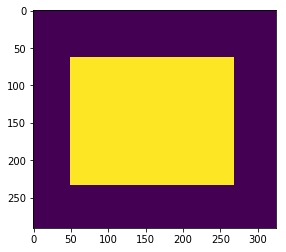

In [11]:
im_flat = imarray.ravel()
im_flat[im_flat < 127] = 0
im_flat[im_flat >= 127] = 1
im_flat = im_flat.reshape(imarray.shape)[:,:,0]
plt.imshow(im_flat)

In [12]:
find_correction_angle(im_flat)

0